# Desafio semana 08 AceleraDev DS Codenation

### Importar bibliotecas

In [606]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sct
import statsmodels.api as sm
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Carregar arquivos

In [607]:
# Importação dos dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Exploração dos dados

In [608]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 14.4+ MB


In [609]:
train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [610]:
train.isna().sum().sort_values(ascending=False)

CO_UF_ENTIDADE_CERTIFICACAO    12092
NO_ENTIDADE_CERTIFICACAO       12092
SG_UF_ENTIDADE_CERTIFICACAO    12092
Q041                           10792
TP_SIT_FUNC_ESC                 9448
                               ...  
Q002                               0
Q003                               0
Q004                               0
Q005                               0
Unnamed: 0                         0
Length: 167, dtype: int64

### Encontrando as melhores features

In [611]:
number_columns = list(test.select_dtypes(include='number').columns)

In [612]:
X = train[number_columns]
y = train.NU_NOTA_MT

In [613]:
# Eliminando valores nulos na base de teste
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

c:\program files (x86)\python\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [614]:
selector = SelectKBest(f_classif, k=13)
X_new = selector.fit_transform(X, y)

c:\program files (x86)\python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [11 14] are constant.
  UserWarning)
c:\program files (x86)\python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
c:\program files (x86)\python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [615]:
selector.scores_

array([  0.97161968,   0.99083283,   1.07516503,   0.90111788,
         0.83877107,   0.96827772,   1.64035491,   0.91324997,
         1.20450896,   1.61970267,   1.02830467,          nan,
         0.53399451,   1.51567463,          inf,   0.95262464,
         0.38405271,   0.43318874,  24.56776772,  24.56776772,
       266.79229722,  22.22600743,  22.12089051,  90.61095187,
         1.11724277,   3.66576667,  21.80868443,  16.88919223,
        15.37603918,  17.4013539 ,   6.64300999,  18.51367756])

In [616]:
features = list(selector.get_support(indices=True))

In [617]:
base = []
for x in features:
    base.append(number_columns[x])

### Analise gráfica

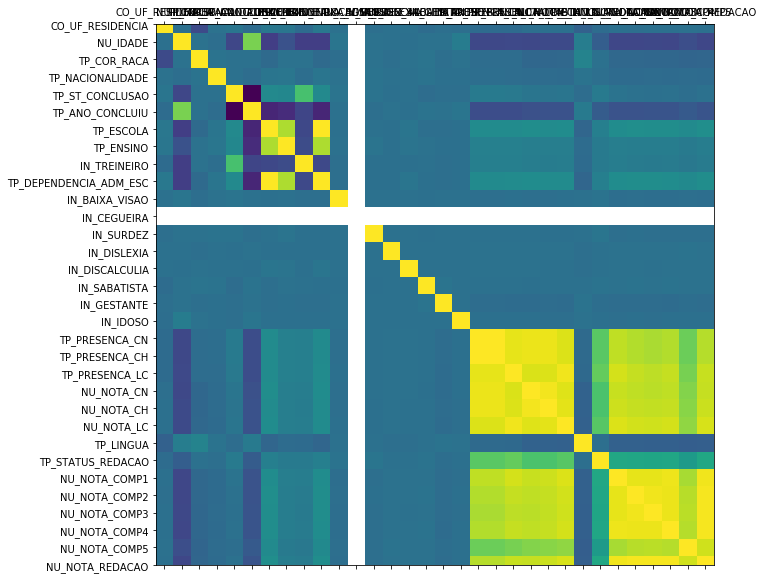

In [618]:
def plot_corr(X, size=10):
    corr = X.corr()  
    fig, zx = plt.subplots(figsize = (size, size))
    zx.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  
plot_corr(X)

### Ajustes dos dados

In [619]:
# Seleção das features e target
X = X[base] #Filtrando as variáveis 
# y já definido na escolha das variáveis

# Dividindo dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [620]:
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    y_true = list(y_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = clf.score(X_test, y_test)
    if score < 0 or score > 1:
        print("score: FAIL")
        score = 0
    else:
        print("score:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("coef_: ", clf.coef_)
        print("intercept_: ", clf.intercept_)
        print()

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time, clf


In [621]:
results = []

In [622]:
print('=' * 80)
print('LinearSVR')
results.append(benchmark((LinearSVR())))

LinearSVR
________________________________________________________________________________
Training: 
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
train time: 1.173s
test time:  0.000s
score:   0.790
coef_:  [ 1.07908868e-01  1.80475293e-03  1.80475293e-03  1.68109596e+01
  3.18320075e-01  2.85043081e-02  7.54373605e-01  3.19234015e-02
  5.30432957e-02  9.96870363e-02 -6.19930429e-02 -1.30044617e-01
 -7.38392599e-03]
intercept_:  [0.00011508]




c:\program files (x86)\python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [623]:
print('=' * 80)
print('DecisionTreeRegressor')
results.append(benchmark((DecisionTreeRegressor())))

DecisionTreeRegressor
________________________________________________________________________________
Training: 
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
train time: 0.091s
test time:  0.000s
score:   0.842



In [624]:
print('=' * 80)
print('KNeighborsRegressor')
results.append(benchmark((KNeighborsRegressor())))

KNeighborsRegressor
________________________________________________________________________________
Training: 
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
train time: 0.070s
test time:  0.151s
score:   0.905



In [625]:
print('=' * 80)
print('Ridge')
results.append(benchmark((Ridge(alpha=1.0))))

Ridge
________________________________________________________________________________
Training: 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
train time: 0.007s
test time:  0.002s
score:   0.911
coef_:  [ 5.65701508e+01 -8.85104873e+01 -8.85104873e+01  1.93399899e+02
  4.21476788e-01  3.26444688e-02  4.30221336e-01 -5.28513877e-02
 -2.54008971e-02  3.26082665e-02  3.78993072e-02  5.34666215e-02
  4.57116989e-02]
intercept_:  -0.745071561721943




In [626]:
print('=' * 80)
print('RidgeCV')
results.append(benchmark((RidgeCV())))

RidgeCV
________________________________________________________________________________
Training: 
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
train time: 0.016s
test time:  0.000s
score:   0.911
coef_:  [ 5.65701508e+01 -8.85104873e+01 -8.85104873e+01  1.93399899e+02
  4.21449853e-01  3.26142222e-02  4.30192304e-01 -5.28597184e-02
 -2.54088145e-02  3.26006132e-02  3.78913284e-02  5.34605213e-02
  4.56839056e-02]
intercept_:  -0.6984766077472955




In [627]:
print('=' * 80)
print('LinearRegression')
results.append(benchmark((LinearRegression())))

LinearRegression
________________________________________________________________________________
Training: 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
train time: 0.011s
test time:  0.002s
score:   0.911
coef_:  [ 1.13167311e+02  1.91852010e+06 -1.91869957e+06  1.96472075e+02
  4.22347142e-01  3.49101269e-02  4.26378904e-01 -4.49760304e+08
 -4.49760303e+08 -4.49760303e+08 -4.49760303e+08 -4.49760303e+08
  4.49760304e+08]
intercept_:  -0.7274704746321277




In [628]:
print('=' * 80)
print('Lasso')
results.append(benchmark((Lasso())))

Lasso
________________________________________________________________________________
Training: 
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
train time: 0.881s
test time:  0.001s
score:   0.902
coef_:  [ 0.         -0.         -0.          0.          0.34607221 -0.12841041
  0.66780127  0.01865022  0.02662053  0.02338259  0.02610477  0.03907763
  0.05449364]
intercept_:  -2.4003074249723113




In [629]:
print('=' * 80)
print('ElasticNet')
results.append(benchmark((ElasticNet())))

ElasticNet
________________________________________________________________________________
Training: 
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
train time: 0.199s
test time:  0.003s
score:   0.902
coef_:  [ 0.         -0.63293021 -0.6329277   0.87638975  0.34698494 -0.1275307
  0.66677777  0.11581478  0.12282811  0.11909301  0.12162258  0.13488145
 -0.04164236]
intercept_:  -2.3713683091256144




In [630]:
print('=' * 80)
print('Lars')
results.append(benchmark((Lars())))

Lars
________________________________________________________________________________
Training: 
Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=500, normalize=True, precompute='auto', verbose=False)
train time: 0.010s
test time:  0.002s
score:   0.911
coef_:  [ 1.13157428e+02 -1.79469334e+02  0.00000000e+00  1.96471290e+02
  4.22346733e-01  3.49165533e-02  4.26350931e-01  0.00000000e+00
  2.74895136e-02  8.85986833e-02  9.24018181e-02  1.08303766e-01
 -8.87761570e-03]
intercept_:  -0.7360569961109604




In [631]:
print('=' * 80)
print('LassoLars')
results.append(benchmark((LassoLars())))

LassoLars
________________________________________________________________________________
Training: 
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
train time: 0.006s
test time:  0.002s
score:   0.676
coef_:  [0.         0.         0.         0.         0.00459988 0.
 0.46857907 0.         0.         0.         0.         0.
 0.        ]
intercept_:  175.4103921661604




In [632]:
print('=' * 80)
print('HuberRegressor')
results.append(benchmark((HuberRegressor())))

HuberRegressor
________________________________________________________________________________
Training: 
HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
train time: 0.350s
test time:  0.002s
score:   0.900
coef_:  [ 0.02138638 -2.08375506 -2.08375506  2.30922998  0.3220545  -0.14553115
  0.69720742 -0.0389271   0.04374532 -0.03340505  0.04790776  0.04970444
  0.06902538]
intercept_:  -1.3882757349353696




c:\program files (x86)\python\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [633]:
print('=' * 80)
print('BayesianRidge')
results.append(benchmark((BayesianRidge())))

BayesianRidge
________________________________________________________________________________
Training: 
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
train time: 0.017s
test time:  0.002s
score:   0.902
coef_:  [ 0.00188765 -0.14982143 -0.14982143  0.17154965  0.3460776  -0.12775287
  0.66688859  0.00930354  0.01465239  0.00956473  0.0094035   0.02506673
  0.06799088]
intercept_:  -2.3885494728669983




In [634]:
print('=' * 80)
print('PassiveAggressiveRegressor')
results.append(benchmark((PassiveAggressiveRegressor())))

PassiveAggressiveRegressor
________________________________________________________________________________
Training: 
PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
train time: 0.011s
test time:  0.002s
score:   0.753
coef_:  [ 7.47849219e-04 -2.53975733e-02 -2.53975733e-02  1.26468129e-01
  3.34643259e-01 -2.74157156e-02  7.91673279e-01  8.16307928e-02
  9.07949238e-02 -8.62274582e-02 -7.03783788e-02  3.69984434e-02
  5.28183229e-02]
intercept_:  [0.0014528]




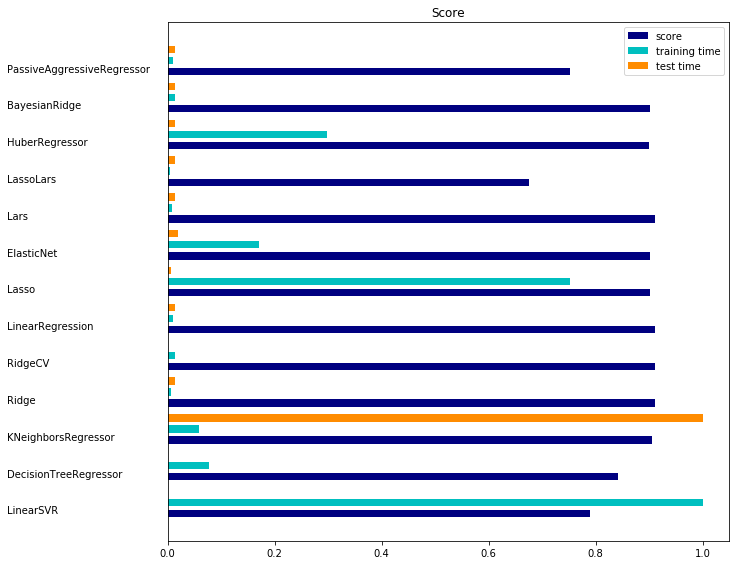

In [635]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

### Escolhendo modelo de regressão

In [636]:
model = benchmark(Ridge())[4]

________________________________________________________________________________
Training: 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
train time: 0.007s
test time:  0.001s
score:   0.911
coef_:  [ 5.65701508e+01 -8.85104873e+01 -8.85104873e+01  1.93399899e+02
  4.21476788e-01  3.26444688e-02  4.30221336e-01 -5.28513877e-02
 -2.54008971e-02  3.26082665e-02  3.78993072e-02  5.34666215e-02
  4.57116989e-02]
intercept_:  -0.745071561721943




### Treinando os dados de teste

In [637]:
# Preparando base de teste
df2 = test[base]

# Eliminando valores nulos na base de teste
df2.fillna(0, inplace=True)

c:\program files (x86)\python\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [638]:
# Realizando a predição
df2['NU_NOTA_MT'] = model.predict(df2)

# Inserindo os numeros de inscrição
df2['NU_INSCRICAO'] = test['NU_INSCRICAO']

# Preparando df para exportação
df2 = df2[['NU_INSCRICAO', 'NU_NOTA_MT']]

c:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [639]:
df2.to_csv('answer.csv', index=False)